In [ ]:
# Assignment 2
# ANLY-590
# Yuxuan Yao
# yy560

In [45]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Feedforward: Building a ReLU neural network

## 1.1 Draw a network 
* 2 inputs
* 1 hidden layers with 4 hidden units and a
* 1-class output (for binary classification)


![1.1](./A2_11.jpg)

## 1.2 Write out the mathematical equation n for the output of this network (feel free to break the input-output relationship into multiple equations)

![1.2](./A2_12.jpg)

## 1.3 Write out the forward-pass function n in python, call it $ff\_nn\_ReLu(...)$

In [55]:
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))
def ff_nn_ReLu(X, W, b, V, c):

    res = relu(np.array(X)@np.array(W)+b)
    return sigmoid(np.dot(res,np.array(V))+c)

## 1.4 Class probabilities associated with the forward pass of each sample

In [7]:
W = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
V = [1, 0, -1, 1]
c = 1
X = [[1, -1], [0, -1], [0, 1]]
ff_nn_ReLu(X,W,b,V,c)

array([0.81757448, 0.62245933, 0.62245933])

The probabilities associated with the forward pass of each sample are 0.81757448, 0.62245933 and 0.62245933

# 2 Gradient Descent

## 2.1 Partial derivatives of f with respect to x and to y

$f_x(x,y) = -3x^2 + 100x -200y^2$

$f_y(x,y) = 800y^3 - 400xy$

## 2.2 Create a visualization of the contours of this function

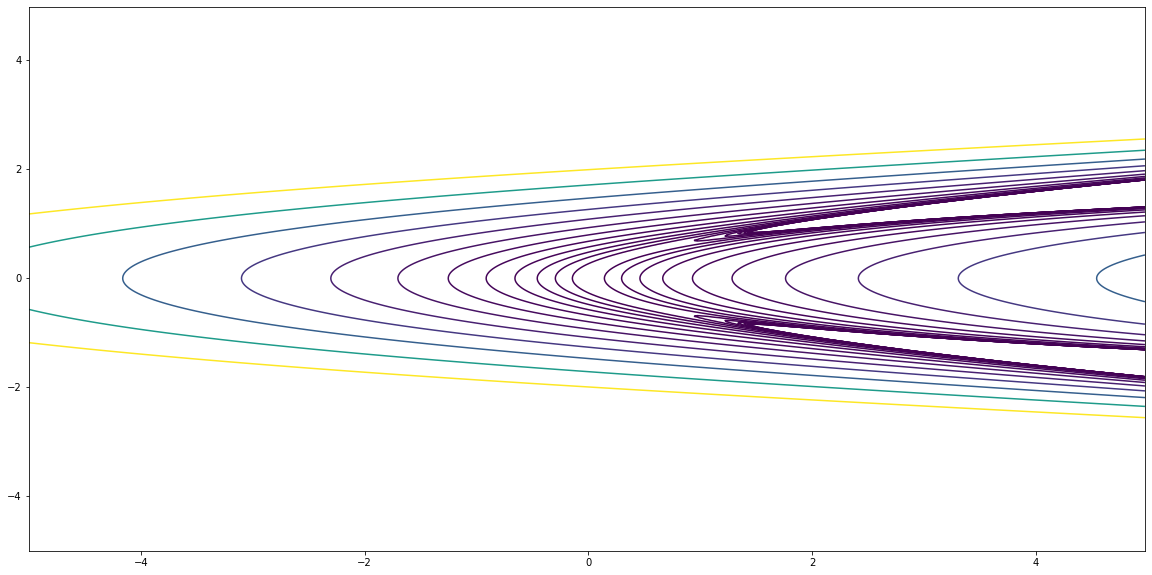

In [9]:
delta =0.025
x=np.arange(-5,5,delta)
y=np.arange(-5,5,delta)
X, Y=np.meshgrid(x, y)
Z = 3-X**3 + 50*(2*Y**2-X)**2
plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-1.5,3.5,20,base=10))

## 2.3 Write a Gradient Descent algorithm for finding the minimum of the function  Visualize your results with a few different learning rates

In [10]:
def gradient(inputs):
    x,y = inputs
    df_dx = -3*x**2+100*x-200*y**2
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [11]:
def gradient_descent(start_point, iterations, learning_rate):
    current_point = start_point
    track = [current_point]
    for i in range(iterations):
        cur_grad = gradient(current_point)
        current_point = current_point - learning_rate * cur_grad
        track.append(current_point)
    return np.array(track)

### learning_rate=0.001

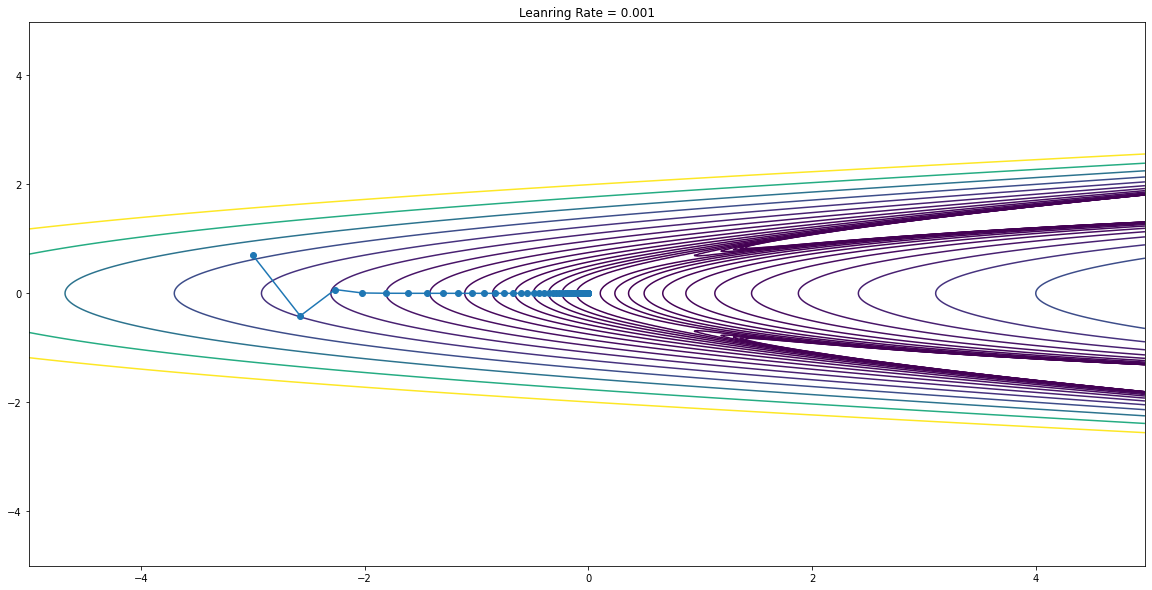

In [12]:
traj = gradient_descent(start_point=[-3,0.7] , iterations=100, learning_rate=0.001)
plt.figure(figsize=(20,10))
plt.title('Leanring Rate = 0.001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### learning_rate=0.0001

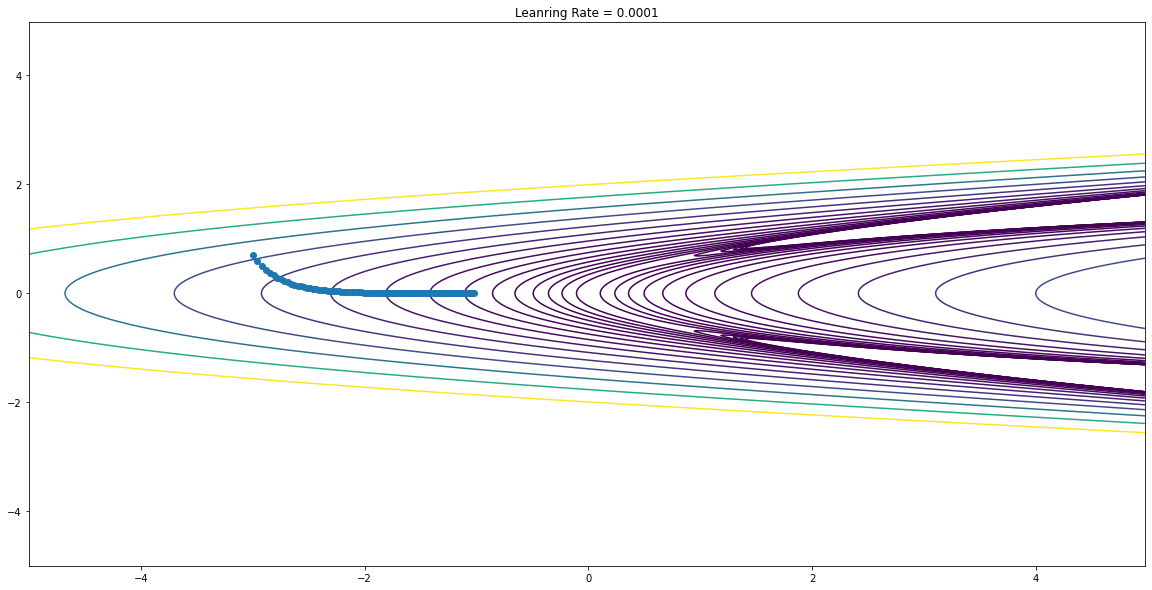

In [13]:
traj = gradient_descent(start_point=[-3,0.7] , iterations=100, learning_rate=0.0001)
plt.figure(figsize=(20,10))
plt.title('Leanring Rate = 0.0001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### learning_rate=0.00001

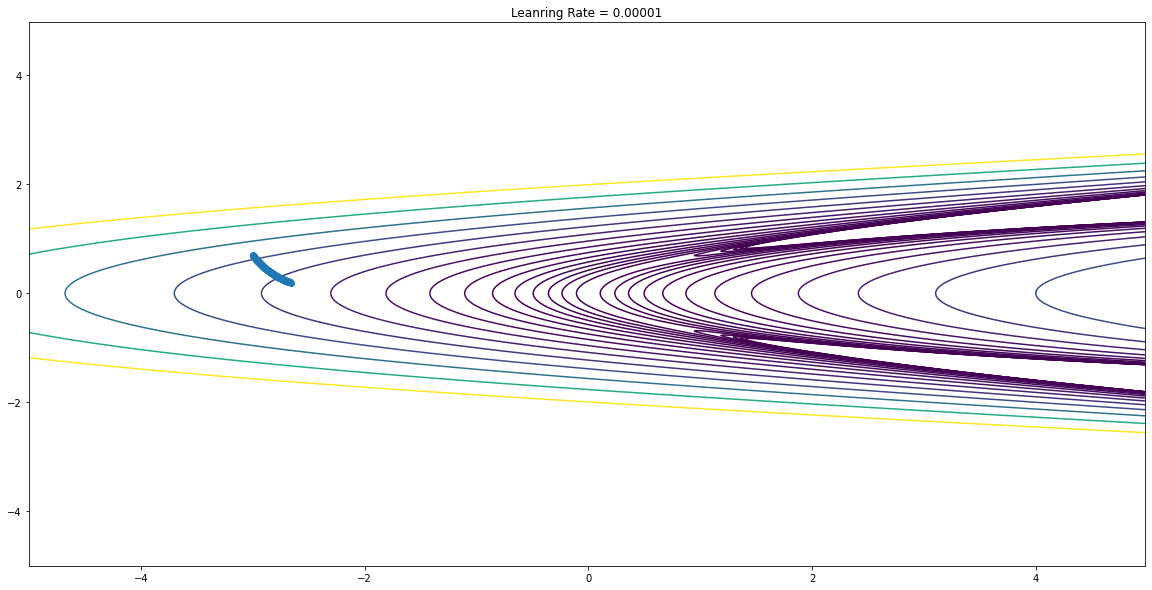

In [14]:
traj = gradient_descent(start_point=[-3,0.7] , iterations=100, learning_rate=0.00001)
plt.figure(figsize=(20,10))
plt.title('Leanring Rate = 0.00001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 2.4 Write a Gradient Descent With Momentum algorithm for finding the minimum Visualize your results with a few different settings of the algorithm’s hyperparameters

In [15]:
def gradient_descent_momentum(start_point, iterations, learning_rate, alpha, v):
    current_point = start_point
    track = [current_point]
    velocity = v
    for i in range(iterations):
        cur_grad = gradient(current_point)
        if (abs(cur_grad[0] < 0.001 and abs(cur_grad[1]) < 0.001)):
            return np.array(track)
        velocity = alpha * velocity - learning_rate * cur_grad     
        current_point = current_point + velocity
        track.append(current_point)    
    return np.array(track)

### Alpha = 0.5, learning_rate=0.001

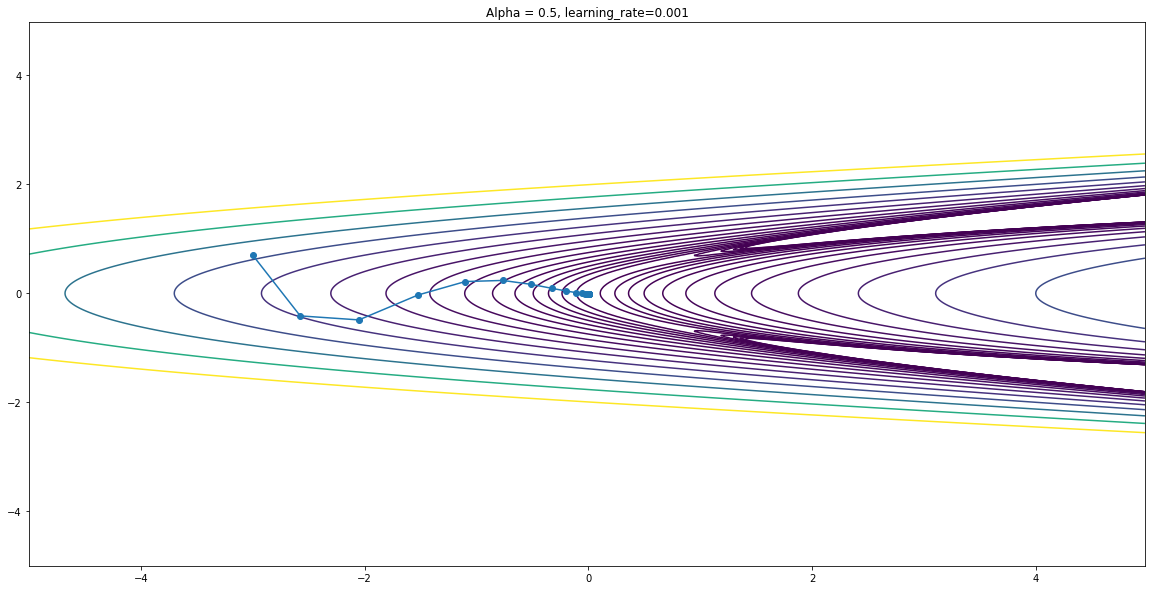

In [16]:
traj = gradient_descent_momentum(iterations=100, learning_rate=0.001, start_point=[-3,0.7], alpha = 0.5, v = np.array([0,0]))
plt.figure(figsize=(20,10))
plt.title('Alpha = 0.5, learning_rate=0.001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Alpha = 0.3, learning_rate=0.001

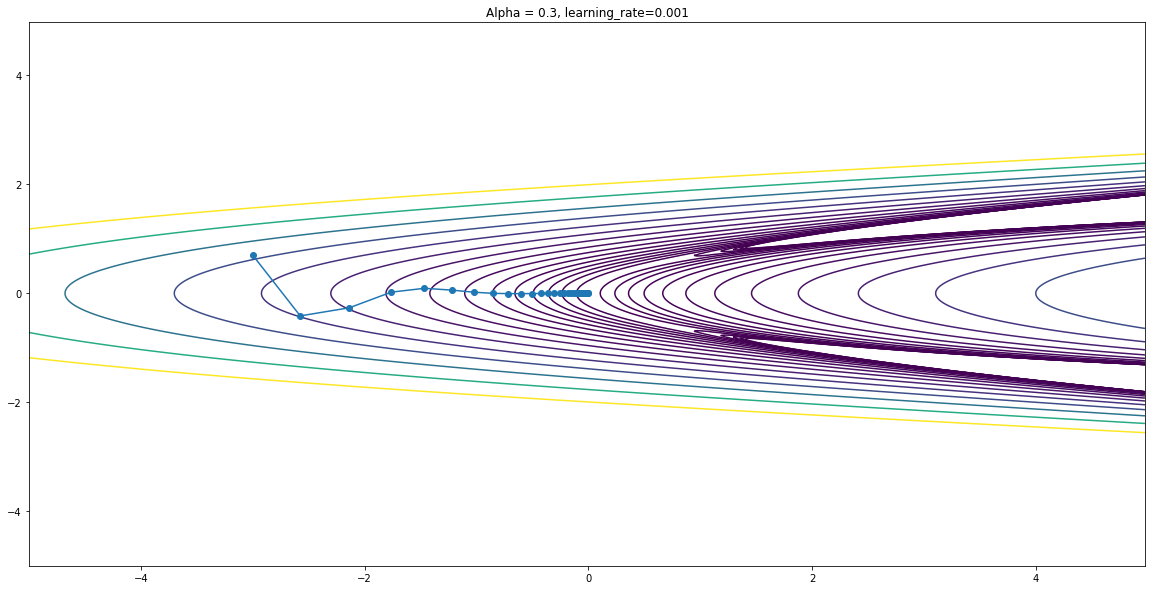

In [17]:
traj = gradient_descent_momentum(iterations=100, learning_rate=0.001, start_point=[-3,0.7], alpha = 0.3, v = np.array([0,0]))
plt.figure(figsize=(20,10))
plt.title('Alpha = 0.3, learning_rate=0.001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Alpha = 0.3, learning_rate=0.0001

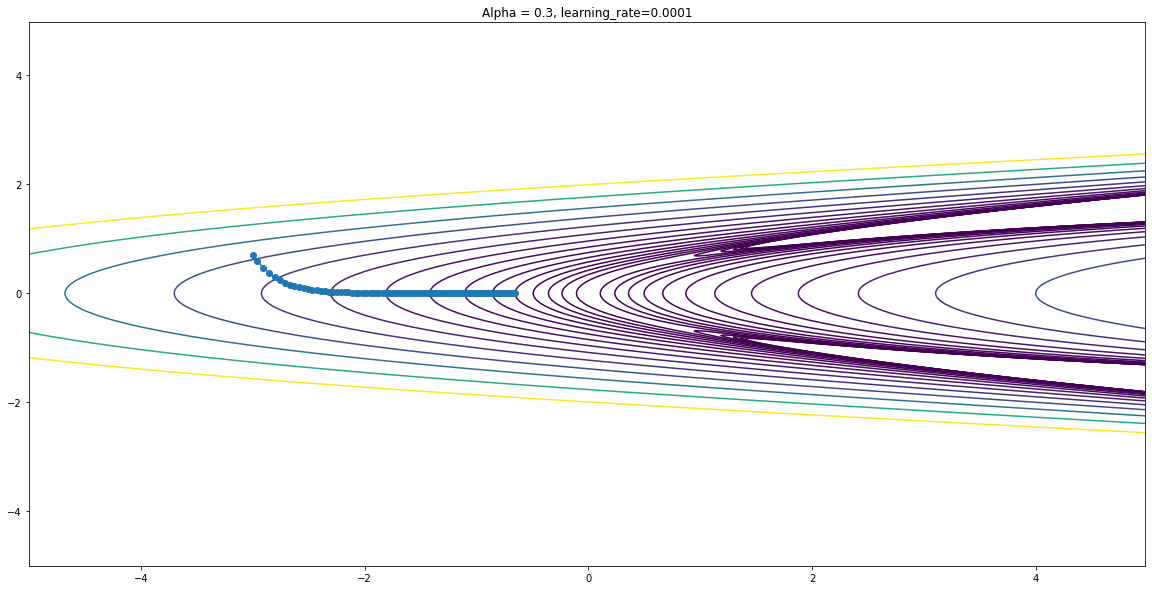

In [18]:
traj = gradient_descent_momentum(iterations=100, learning_rate=0.0001, start_point=[-3,0.7], alpha = 0.3, v = np.array([0,0]))
plt.figure(figsize=(20,10))
plt.title('Alpha = 0.3, learning_rate=0.0001')
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#  3 Backprop

## 3.1 . For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters

$$Loss = -y_i \cdot log(\hat{y}_i)-(1-y_i) \cdot log(1-\hat{y}_i) $$

$$\frac{\sigma L}{\sigma v_4} = (\frac{y}{\hat{y}_i}+\frac{1-y}{1-\hat{y}_i}) \cdot \frac{e^{-z}}{(1+e^{-z})^2} \cdot h_4$$

$$\frac{\sigma L}{\sigma b_4} = (\frac{y}{\hat{y}_i}+\frac{1-y}{1-\hat{y}_i}) \cdot \frac{e^{-z}}{(1+e^{-z})^2} \cdot v_4$$

$$\frac{\sigma L}{\sigma w_{24}} = (\frac{y}{\hat{y}_i}+\frac{1-y}{1-\hat{y}_i}) \cdot \frac{e^{-z}}{(1+e^{-z})^2} \cdot v_4x_2$$

## 3.2 Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location

In [122]:
def grad_f(x, y, y_hat, w, b, v, c):
    loss_y_hat = (y/y_hat - (1-y)/(1-y_hat))
    h = relu(np.array(x)@np.array(w)+b)
    
    dw = x.T.dot(np.expand_dims((loss_y_hat * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
    db = (loss_y_hat* y_hat*(1-y_hat)).T.dot(np.where(h<=0,0,1))*v
    
    dv = (loss_y_hat* y_hat*(1-y_hat)).T.dot(h)
    dc = loss_y_hat.dot(y_hat*(1-y_hat))
    
    return np.array([dw,db,dv,dc])/len(y)

In [123]:
x = np.array([[1,-1], [0,-1], [0, 1]])
w = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
v = np.array([1, 0, -1, 1])
c = 1
y_pred = ff_nn_ReLu(x,w,b,v,c)

In [124]:
y_pred

array([0.81757448, 0.62245933, 0.62245933])

In [125]:
grad_f(x, np.array([1,1,1]),y_pred,w,b,v,c)

array([array([[ 0.06080851,  0.        , -0.06080851,  0.06080851],
       [-0.06080851,  0.        ,  0.06080851, -0.06080851]]),
       array([ 0.06080851,  0.        , -0.31250229,  0.12584689]),
       array([0.06080851, 0.        , 0.28209803, 0.12584689]),
       0.3125022871342158], dtype=object)

## 3.3 Generate a synthetic dataset like the XOR pattern (see below)

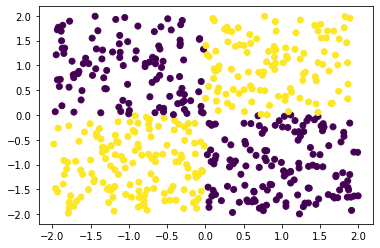

In [126]:
x=4*np.random.rand(500,2)-2
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

## 3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result

In [127]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

In [128]:
def grad_descent(x, y_true, w, b, v, c, iterations=10, learning_rate=0.1):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    for i in range(iterations):
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        w = w+learning_rate*dw
        b = b+learning_rate*db
        v = v+learning_rate*dv
        c = c+learning_rate*dc
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [129]:
array, losses = grad_descent(X, y, w, b,v,c)

In [130]:
losses

[508.4732875881929,
 486.86622494000085,
 467.56698356863444,
 450.48372335305413,
 435.6210072652458,
 422.7623716001996,
 411.6401055178843,
 402.10703761983507,
 394.0202607413555,
 387.21923518758655,
 381.5454832390819]

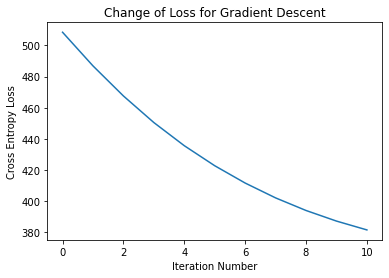

In [131]:
plt.plot(losses)
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Iteration Number")
plt.title("Change of Loss for Gradient Descent")
plt.show()

## 3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently

In [132]:
def grad_descent_w_momentum(x, y_true, w, b, v, c, iterations=10, alpha=.1, epsilon=0.5):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    vw = np.zeros(w.shape)
    vb = np.zeros(b.shape)
    vv = np.zeros(v.shape)
    vc = 0
    for _ in range(iterations):
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        vw = alpha*vw - epsilon*dw
        vb = alpha*vb - epsilon*db
        vv = alpha*vv - epsilon*dv
        vc = alpha*vc - epsilon*dc
        w = w-vw
        b = b-vb
        v = v-vv
        c = c-vc
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [133]:
array_m, losses_m =  grad_descent_w_momentum(X, y, w,b,v,c)
losses_m

[508.4732875881929,
 414.8666939192808,
 370.540161909759,
 358.27788315775376,
 354.87900119062107,
 353.72338008769856,
 353.2150316736119,
 352.8851054253812,
 352.6077704702281,
 352.3527623620165,
 352.1102050529948]

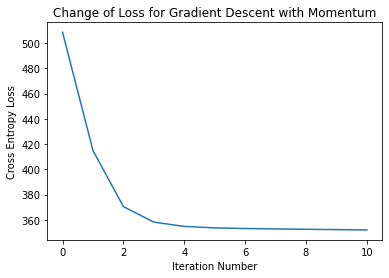

In [134]:
plt.plot(losses_m)
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Iteration Number")
plt.title("Change of Loss for Gradient Descent with Momentum")
plt.show()

#### As the plots show, when interations increases, gradient descent with momentum converges quicker than the gradient descent without momentum.

## 3.6 Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot

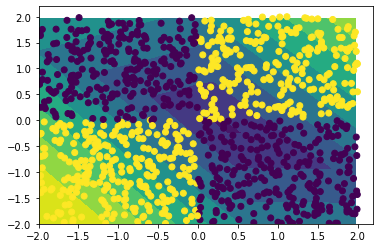

In [141]:
x0 = []
x1 = []
for i,x in enumerate(X):
    if x[0]*x[1] >= 0:
        y[i] = 1
        x1.append(x)
    else:
        x0.append(x)
x1 = np.array(x1)
x0 = np.array(x0)
x1 = np.arange(-2.0, 2.0, 0.025)
x2 = np.arange(-2.0, 2.0, 0.025)
X1, X2 = np.meshgrid(x1, x2)
predict = ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T,array_m[0],array_m[1],array_m[2],array_m[3]).reshape((160, 160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, predict)
plt.scatter(X[:,0],X[:,1],c=y)